# Imports

In [ ]:
from __future__ import absolute_import, division, print_function, unicode_literals # legacy compatibility
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, initializers
from keras.models import load_model
import tensorflow_datasets as tfds
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping, ModelCheckpoint
import datetime
from keras.utils import to_categorical


In [ ]:
# data augmentation
%pip install h5py

## Θεωρητικό Μέρος

#### Ερώτημα 1
> Παρουσιάστε ένα συγκριτικό πίνακα με τα επίπεδα, το μέγεθος των φίλτρων, συνάρτηση ενεργοποίησης, πλήθος παραμέτρων και τεχνικές pooling και dropout που χρησιμοποιούν τα 3 διαφορετικά δίκτυα που παρουσιάζονται στα προαναφερθέντα άρθρα.

|  |LeNet|AlexNet|VGG|
|--|:---:|:-----:|:-:|
|**Επίπεδα**|7 (2 Convolution, 2 Pooling, 3 Dense)| 11 (5 Convolution, 3 Pooling, 3 Dense)|Μεταβλητός Αριθμός Επιπέδων (κάθε block 1 Pooling, σταθερός αριθμός Dense: 3)|
|**Μέγεθος Φίλτρων**|5x5, 5x5|11x11, 5x5, 3x3, 3x3, 3x3|3x3|
|**Συνάρτηση Ενεργοποίησης**|Sigmoid|ReLU|ReLU|
|**Πλήθος Παραμέτρων**|περίπου 46.000|περίπου 22.000.000|περίπου 30.000.000|
|**Τεχνικές Pooling**|Average Pooling, size = 2x2, strides = 2|Max Pooling, size = 2x2, strides = 2|Max Pooling, size = 2x2, strides = 2|
|**Τεχνικές Dropout**|-|50%|50%|


#### Ερώτημα 2
> Ποιες είναι οι βασικές διαφορές στην αρχιτεκτονική και την απόδοση μεταξύ των τριών δικτύων;



**Διαφορές στην Αρχιτεκτονική**

Το δίκτυο LeNet έχει πολύ λιγότερες εκπαιδεύσιμες παραμέτρους σε σχέση με τα δίκτυα AlexNet και VGG. 

Επιπλέον, έχει μικρότερο αριθμό επιπέδων και ως συνάρτηση ενεργοποίησης χρησιμοποιεί την Sigmoid, εν αντιθέσει των άλλων δύο που χρησιμοποιούν την ReLU. Η συνάρτηση ενεργοποίησης ReLU βοηθάει στην γρηγορότερη εκπαίδευση, επειδή για μεγάλες τιμές η παράγωγος της Sigmoid μηδενίζει, ενώ της ReLU μένει σταθερή. Ένα ακόμη πλεονέκτημα της ReLU, συγκριτικά με την Sigmoid, είναι πως έχει μιρκότερο υπλογιστικό κόστος.

Τα δίκτυα AlexNet και VGG χρησιμοποιούν Max-Pooling τεχνική, ενώ το LeNet Average-Pooling.

Το VGG δίκτυο χρησιμοποιεί τα μικρότερα σε μέγεθος φίλτρα, το AlexNet τα μεγαλύτερα, ενώ είναι το μόνο από τα τρία που έχει μεταβλητό μέγεθος φίλτρων.

Επιπροσθέτως, το VGG χρησιμοποιεί τεχνική Pooling αφού δημιουργηθεί ένα block από συνελικτικά επίπεδα, σε αντίθεση με τα άλλα δίκτυα που ύστερα από κάθε συνελικτικό επίπεδο υπάρχει ένα επίπεδο pooling. 

Τέλος, τα δίκτυα AlexNet και VGG χρησιμοποιούν τεχνική Dropout με σκοπό να αντιμετωπισθεί το φαινόμενο του overfitting, εφόσον παρουσιαστεί.

---
---

**Απόδοση**

Το δίκτυο LeNet παρουσίαζει τα χειρότερα αποτελέσματα για περίπλοκες εικόνες από τα τρία δίκτυα. Το γεγονός αυτό είναι αναμενόμενο, αφού έχει απλή αρχιτεκτονική και ο πρωταρχικός σκοπός λειτουργίας του ήταν η κατηγοροποίηση εικόνων που περιέχουν μόνο ψηφία, στην οποία λειτουργία έχει πολύ καλή επίδοση.

Το δίκτυο AlexNet έχει βαθύτερη αρχιτεκτονική από του LeNet, γεγονός που του επέτρεψε να έχει καλυτερη απόδοση σε Image Classification, αφού ο μεγαλύτερος αριθμός εκπαιδεύσιμων παραμέτρων και η αρχιτεκτονική του βοηθούν στην αναγνώριση περισσότερων και πιο σύνθετων χαρακτηριστικών.

Το δίκτυο VGG παρουσιάζει την καλύτερα απόδοση από τα τρία μοντέλα. Η αρχιτεκτονική του που "στοιβάζονται" συνελικτικά επίπεδα πριν χρησιμοποιηθεί τεχνική pooling βελτιώνει την επίδοση του σε κόστος όμως της πολυπλοκότητας, αφού έχει τις περισσότερες παραμέτρους και επιπλεόν είναι το πιο βαθύ δίκτυο εκ των τριών.

## Υλοποίηση Αλγορίθμου

### Εισαγωγή και επισκόπηση του συνόλου δεδομένων

In [2]:
# helper functions

# select from from_list elements with index in index_list
def select_from_list(from_list, index_list):
  filtered_list= [from_list[i] for i in index_list]
  return(filtered_list)

# append in filtered_list the index of each element of unfilterd_list if it exists in in target_list
def get_ds_index(unfiliterd_list, target_list):
  index = 0
  filtered_list=[]
  for i_ in unfiliterd_list:
    if i_[0] in target_list:
      filtered_list.append(index)
    index += 1
  return(filtered_list)


In [3]:
# load the entire dataset

(x_train_all, y_train_all), (x_test_all, y_test_all) = tf.keras.datasets.cifar100.load_data(label_mode='fine')

169001437/169001437 [==============================] - 13s 0us/step


In [4]:
print(x_train_all.shape)

(50000, 32, 32, 3)


Η κάθε ομάδα θα δουλέψει με διαφορετικό υποσύνολο του dataset.
Στο επόμενο κελί, αντικαταστήστε την τιμή της μεταβλητής `team_seed` με τον αριθμό που αντιστοιχεί στην ομάδας σας. 

In [5]:
# REPLACE WITH YOUR TEAM NUMBER
team_seed = 36

In [6]:
# select from CIFAR100 20 classes
cifar100_classes_url = "https://pastebin.com/raw/nzE1n98V"
classes_num = 20

Δημιουργούμε το μοναδικό dataset της ομάδας μας:

In [7]:
team_classes = pd.read_csv(cifar100_classes_url, sep=',', header=None)
CIFAR100_LABELS_LIST = pd.read_csv('https://pastebin.com/raw/qgDaNggt', sep=',', header=None).astype(str).values.tolist()[0]

our_index = team_classes.iloc[team_seed,:].values.tolist()
our_classes = select_from_list(CIFAR100_LABELS_LIST, our_index)
train_index = get_ds_index(y_train_all, our_index)
test_index = get_ds_index(y_test_all, our_index)

x_train_ds = np.asarray(select_from_list(x_train_all, train_index))
y_train_ds = np.asarray(select_from_list(y_train_all, train_index))
x_test_ds = np.asarray(select_from_list(x_test_all, test_index))
y_test_ds = np.asarray(select_from_list(y_test_all, test_index))

In [8]:
# print our classes
print(our_classes)

[' aquarium_fish', ' bear', ' boy', ' castle', ' caterpillar', ' kangaroo', ' lamp', ' lion', ' plain', ' possum', ' rocket', ' rose', ' seal', ' shark', ' snake', ' squirrel', ' tractor', ' tulip', ' willow_tree', ' wolf']


Train: X=(8500, 32, 32, 3), y=(8500, 1)
Validation: X=(1500, 32, 32, 3), y=(1500, 1)
Test: X=(2000, 32, 32, 3), y=(2000, 1)


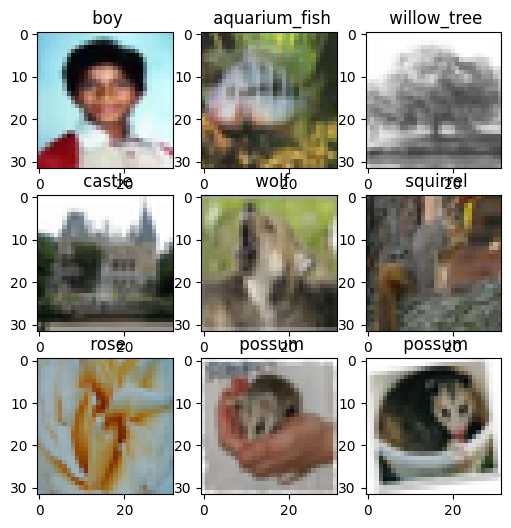

In [9]:
# get (train) dataset dimensions
data_size, img_rows, img_cols, img_channels = x_train_ds.shape

# set validation set percentage (wrt the training set size)
validation_percentage = 0.15
val_size = round(validation_percentage * data_size)

# Reserve val_size samples for validation and normalize all values
x_val = x_train_ds[-val_size:]/255
y_val = y_train_ds[-val_size:]
x_train = x_train_ds[:-val_size]/255
y_train = y_train_ds[:-val_size]
x_test = x_test_ds/255
y_test = y_test_ds

# summarize loaded dataset
print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Validation: X=%s, y=%s' % (x_val.shape, y_val.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

# get class label from class index
def class_label_from_index(fine_category):
  return(CIFAR100_LABELS_LIST[fine_category.item(0)])

# plot first few images
plt.figure(figsize=(6, 6))
for i in range(9):
	# define subplot
  plt.subplot(330 + 1 + i).set_title(class_label_from_index(y_train[i]))
	# plot raw pixel data
  plt.imshow(x_train[i], cmap=plt.get_cmap('gray'))
  #show the figure
plt.show()

In [10]:
# Map Image Labels to [0, classes_num-1] = [0, 19]
def create_dictionary(label_ds):
    dictionary = {}
    i=0
    for label in label_ds:
        if label not in dictionary.keys():
          dictionary[label] = i
          i+=1
    return dictionary

def mapping(label_ds,dictionary): 
    return [dictionary[x] for x in label_ds]


# Create Label Dict
label_dict = create_dictionary(y_train.reshape(1,-1)[0])
# Apply mapping
y_train = mapping(y_train.reshape(1,-1)[0], label_dict)
y_test = mapping(y_test.reshape(1,-1)[0], label_dict)
y_val = mapping(y_val.reshape(1,-1)[0], label_dict)

y_train = np.array([[i] for i in y_train])
y_test = np.array([[i] for i in y_test])
y_val = np.array([[i] for i in y_val])

In [12]:
(ds_train, ds_test), ds_info = tfds.load('cifar100', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)
assert isinstance(ds_train, tf.data.Dataset)
assert isinstance(ds_test, tf.data.Dataset)

### Ερώτημα 1

#### Βήμα 1: Σχεδίαση, μεταγλώττιση και εκπαίδευση των μοντέλων

 1. Σχεδίαστε, μεταγλωττίστε και εκπαιδεύστε τα μοντέλα  **LeNet, AlexNet και  VGG**, καθώς και ένα δικό σας μοντέλο (ονομάστε το π.χ. **MyCNN**) χρησιμοποιώντας διαφορετικούς συνδυασμούς (τουλάχιστον 2 ανά μοντέλο) για [optimizer](https://keras.io/api/optimizers/), [loss](https://keras.io/api/losses/), batch size και epoch.  Για [metrics](https://keras.io/api/metrics/) να χρησιμοποιήσετε την ορθότητα - accuracy (όπως στο Lab5).

##### LeNet

In [24]:
def LeNet_model():

  model = models.Sequential()
  model.add(layers.Input(shape=x_train.shape[1:]))
  model.add(layers.Conv2D(filters=6, kernel_size=5, padding="same", activation="sigmoid"))
  model.add(layers.AvgPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=6, kernel_size=5, activation="sigmoid"))
  model.add(layers.AvgPool2D(pool_size=2, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(120, activation="sigmoid"))
  model.add(layers.Dense(84, activation="sigmoid"))
  model.add(layers.Dense(100, activation="softmax"))

  return model

In [25]:
lenet_adam_20 = LeNet_model()
lenet_adam_20.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
lenet_adam_20.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 6)         456       
                                                                 
 average_pooling2d (AverageP  (None, 16, 16, 6)        0         
 ooling2D)                                                       
                                                                 
 conv2d_13 (Conv2D)          (None, 12, 12, 6)         906       
                                                                 
 average_pooling2d_1 (Averag  (None, 6, 6, 6)          0         
 ePooling2D)                                                     
                                                                 
 flatten_4 (Flatten)         (None, 216)               0         
                                                                 
 dense_12 (Dense)            (None, 120)              

LeNet Model with Adam Optimizer, 20 Epochs

In [26]:
lenet_adam_history_20 = lenet_adam_20.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

lenet_adam_20.save("LeNet_Adam_20E.h5")

Epoch 1/20
266/266 [==============================] - 4s 7ms/step - loss: 3.1347 - accuracy: 0.0504 - val_loss: 3.0146 - val_accuracy: 0.0467
Epoch 2/20
266/266 [==============================] - 1s 4ms/step - loss: 3.0151 - accuracy: 0.0516 - val_loss: 3.0103 - val_accuracy: 0.0447
Epoch 3/20
266/266 [==============================] - 1s 4ms/step - loss: 3.0109 - accuracy: 0.0499 - val_loss: 3.0143 - val_accuracy: 0.0453
Epoch 4/20
266/266 [==============================] - 1s 5ms/step - loss: 2.9561 - accuracy: 0.0800 - val_loss: 2.8187 - val_accuracy: 0.1387
Epoch 5/20
266/266 [==============================] - 1s 4ms/step - loss: 2.6423 - accuracy: 0.1634 - val_loss: 2.5649 - val_accuracy: 0.1827
Epoch 6/20
266/266 [==============================] - 1s 4ms/step - loss: 2.5014 - accuracy: 0.2005 - val_loss: 2.5043 - val_accuracy: 0.1993
Epoch 7/20
266/266 [==============================] - 1s 4ms/step - loss: 2.4432 - accuracy: 0.2176 - val_loss: 2.4440 - val_accuracy: 0.2220
Epoch 

LeNet Model with SGD Optimizer, 20 Epochs

In [27]:
lenet_sgd_20 = LeNet_model()
lenet_sgd_20.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
lenet_sgd_history_20 = lenet_sgd_20.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

lenet_sgd_20.save("LeNet_SGD_20E.h5")

Epoch 1/20
266/266 [==============================] - 2s 5ms/step - loss: 3.7928 - accuracy: 0.0476 - val_loss: 3.3197 - val_accuracy: 0.0447
Epoch 2/20
266/266 [==============================] - 1s 4ms/step - loss: 3.1874 - accuracy: 0.0504 - val_loss: 3.1169 - val_accuracy: 0.0427
Epoch 3/20
266/266 [==============================] - 1s 4ms/step - loss: 3.0845 - accuracy: 0.0499 - val_loss: 3.0651 - val_accuracy: 0.0453
Epoch 4/20
266/266 [==============================] - 1s 4ms/step - loss: 3.0513 - accuracy: 0.0475 - val_loss: 3.0457 - val_accuracy: 0.0453
Epoch 5/20
266/266 [==============================] - 1s 4ms/step - loss: 3.0359 - accuracy: 0.0486 - val_loss: 3.0315 - val_accuracy: 0.0473
Epoch 6/20
266/266 [==============================] - 1s 4ms/step - loss: 3.0278 - accuracy: 0.0504 - val_loss: 3.0271 - val_accuracy: 0.0453
Epoch 7/20
266/266 [==============================] - 1s 4ms/step - loss: 3.0227 - accuracy: 0.0486 - val_loss: 3.0242 - val_accuracy: 0.0427
Epoch 

LeNet Model with Adam Optimizer, 40 Epochs

In [28]:
lenet_adam_40 = LeNet_model()
lenet_adam_40.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
lenet_adam_history_40 = lenet_adam_40.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40)

lenet_adam_40.save("LeNet_Adam_40E.h5")

Epoch 1/40
266/266 [==============================] - 3s 5ms/step - loss: 3.1465 - accuracy: 0.0496 - val_loss: 3.0202 - val_accuracy: 0.0427
Epoch 2/40
266/266 [==============================] - 1s 4ms/step - loss: 3.0162 - accuracy: 0.0476 - val_loss: 3.0200 - val_accuracy: 0.0447
Epoch 3/40
266/266 [==============================] - 2s 6ms/step - loss: 3.0127 - accuracy: 0.0486 - val_loss: 3.0131 - val_accuracy: 0.0447
Epoch 4/40
266/266 [==============================] - 1s 5ms/step - loss: 3.0102 - accuracy: 0.0519 - val_loss: 3.0104 - val_accuracy: 0.0467
Epoch 5/40
266/266 [==============================] - 1s 4ms/step - loss: 2.9734 - accuracy: 0.0753 - val_loss: 2.8996 - val_accuracy: 0.1100
Epoch 6/40
266/266 [==============================] - 1s 4ms/step - loss: 2.7804 - accuracy: 0.1304 - val_loss: 2.7396 - val_accuracy: 0.1460
Epoch 7/40
266/266 [==============================] - 1s 4ms/step - loss: 2.6313 - accuracy: 0.1681 - val_loss: 2.5945 - val_accuracy: 0.1787
Epoch 

LeNet Model with SGD Optimizer, 40 Epochs

In [29]:
lenet_sgd_40 = LeNet_model()
lenet_sgd_40.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
lenet_sgd_history_40 = lenet_sgd_40.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40)

lenet_sgd_40.save("LeNet_SGD_40E.h5")

Epoch 1/40
266/266 [==============================] - 2s 5ms/step - loss: 3.8768 - accuracy: 0.0422 - val_loss: 3.3478 - val_accuracy: 0.0413
Epoch 2/40
266/266 [==============================] - 2s 6ms/step - loss: 3.2039 - accuracy: 0.0514 - val_loss: 3.1239 - val_accuracy: 0.0453
Epoch 3/40
266/266 [==============================] - 1s 5ms/step - loss: 3.0898 - accuracy: 0.0484 - val_loss: 3.0692 - val_accuracy: 0.0467
Epoch 4/40
266/266 [==============================] - 1s 4ms/step - loss: 3.0547 - accuracy: 0.0451 - val_loss: 3.0466 - val_accuracy: 0.0480
Epoch 5/40
266/266 [==============================] - 1s 4ms/step - loss: 3.0376 - accuracy: 0.0486 - val_loss: 3.0314 - val_accuracy: 0.0480
Epoch 6/40
266/266 [==============================] - 1s 4ms/step - loss: 3.0292 - accuracy: 0.0521 - val_loss: 3.0272 - val_accuracy: 0.0447
Epoch 7/40
266/266 [==============================] - 1s 4ms/step - loss: 3.0237 - accuracy: 0.0462 - val_loss: 3.0215 - val_accuracy: 0.0473
Epoch 

##### AlexNet

In [30]:
def AlexNet_model():

  model = models.Sequential()
  model.add(layers.Input(shape=x_train.shape[1:]))
  model.add(layers.Conv2D(filters=96, kernel_size=11, strides=4, activation="relu", padding="same"))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=5, activation="relu", padding="same"))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=384, kernel_size=3, activation="relu", padding="same"))
  model.add(layers.Conv2D(filters=384, kernel_size=3, activation="relu", padding="same"))
  model.add(layers.Conv2D(filters=256, kernel_size=3, activation="relu", padding="same"))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation="relu"))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation="relu"))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(100, activation="softmax"))

  return model

In [31]:
alexNet_adam_20 = AlexNet_model()
alexNet_adam_20.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
alexNet_adam_20.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 8, 8, 96)          34944     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 4, 4, 96)         0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 4, 4, 256)         614656    
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 2, 2, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 2, 2, 384)         885120    
                                                                 
 conv2d_23 (Conv2D)          (None, 2, 2, 384)        

AlexNet Model with Adam Optimizer, 20 Epochs

In [32]:
alexNet_adam_history_20 = alexNet_adam_20.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

alexNet_adam_20.save("AlexNet_Adam_20E.h5")

Epoch 1/20
266/266 [==============================] - 8s 16ms/step - loss: 3.0163 - accuracy: 0.0667 - val_loss: 2.8067 - val_accuracy: 0.0873
Epoch 2/20
266/266 [==============================] - 3s 12ms/step - loss: 2.5719 - accuracy: 0.1580 - val_loss: 2.4524 - val_accuracy: 0.1860
Epoch 3/20
266/266 [==============================] - 3s 11ms/step - loss: 2.3953 - accuracy: 0.2131 - val_loss: 2.3393 - val_accuracy: 0.2340
Epoch 4/20
266/266 [==============================] - 3s 11ms/step - loss: 2.2922 - accuracy: 0.2486 - val_loss: 2.2744 - val_accuracy: 0.2627
Epoch 5/20
266/266 [==============================] - 3s 12ms/step - loss: 2.2129 - accuracy: 0.2869 - val_loss: 2.2236 - val_accuracy: 0.2873
Epoch 6/20
266/266 [==============================] - 3s 12ms/step - loss: 2.1390 - accuracy: 0.3112 - val_loss: 2.1748 - val_accuracy: 0.3133
Epoch 7/20
266/266 [==============================] - 3s 12ms/step - loss: 2.0842 - accuracy: 0.3300 - val_loss: 2.1480 - val_accuracy: 0.3180

AlexNet Model with SGD Optimizer, 20 Epochs

In [33]:
alexNet_sgd_20 = AlexNet_model()
alexNet_sgd_20.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
alexNet_sgd_history_20 = alexNet_sgd_20.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

alexNet_sgd_20.save("AlexNet_SGD_20E.h5")

Epoch 1/20
266/266 [==============================] - 5s 13ms/step - loss: 4.4777 - accuracy: 0.0484 - val_loss: 4.2424 - val_accuracy: 0.0407
Epoch 2/20
266/266 [==============================] - 3s 10ms/step - loss: 3.2645 - accuracy: 0.0504 - val_loss: 3.0952 - val_accuracy: 0.0487
Epoch 3/20
266/266 [==============================] - 3s 10ms/step - loss: 3.0955 - accuracy: 0.0484 - val_loss: 3.0471 - val_accuracy: 0.0427
Epoch 4/20
266/266 [==============================] - 3s 11ms/step - loss: 3.0675 - accuracy: 0.0521 - val_loss: 3.0302 - val_accuracy: 0.0460
Epoch 5/20
266/266 [==============================] - 3s 11ms/step - loss: 3.0467 - accuracy: 0.0562 - val_loss: 3.0041 - val_accuracy: 0.0627
Epoch 6/20
266/266 [==============================] - 3s 11ms/step - loss: 3.0020 - accuracy: 0.0740 - val_loss: 2.9313 - val_accuracy: 0.0720
Epoch 7/20
266/266 [==============================] - 3s 11ms/step - loss: 2.9028 - accuracy: 0.0869 - val_loss: 2.8342 - val_accuracy: 0.1200

AlexNet Model with Adam Optimizer, 40 Epochs

In [34]:
alexNet_adam_40 = AlexNet_model()
alexNet_adam_40.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
alexNet_adam_history_40 = alexNet_adam_40.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40)

alexNet_adam_40.save("AlexNet_Adam_40E.h5")

Epoch 1/40
266/266 [==============================] - 6s 13ms/step - loss: 3.0289 - accuracy: 0.0665 - val_loss: 2.8216 - val_accuracy: 0.0860
Epoch 2/40
266/266 [==============================] - 3s 12ms/step - loss: 2.6041 - accuracy: 0.1472 - val_loss: 2.4678 - val_accuracy: 0.1893
Epoch 3/40
266/266 [==============================] - 3s 12ms/step - loss: 2.4161 - accuracy: 0.2042 - val_loss: 2.4233 - val_accuracy: 0.2013
Epoch 4/40
266/266 [==============================] - 3s 11ms/step - loss: 2.2921 - accuracy: 0.2462 - val_loss: 2.2695 - val_accuracy: 0.2600
Epoch 5/40
266/266 [==============================] - 3s 11ms/step - loss: 2.1860 - accuracy: 0.2886 - val_loss: 2.1108 - val_accuracy: 0.3207
Epoch 6/40
266/266 [==============================] - 3s 12ms/step - loss: 2.1251 - accuracy: 0.3120 - val_loss: 2.1500 - val_accuracy: 0.3067
Epoch 7/40
266/266 [==============================] - 3s 12ms/step - loss: 2.0367 - accuracy: 0.3434 - val_loss: 2.1239 - val_accuracy: 0.3393

AlexNet Model with SGD Optimizer, 40 Epochs

In [35]:
alexNet_sgd_40 = AlexNet_model()
alexNet_sgd_40.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
alexNet_sgd_history_40 = alexNet_sgd_40.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40)

alexNet_sgd_40.save("AlexNet_SGD_40E.h5")

Epoch 1/40
266/266 [==============================] - 4s 11ms/step - loss: 4.4721 - accuracy: 0.0472 - val_loss: 4.1970 - val_accuracy: 0.0520
Epoch 2/40
266/266 [==============================] - 3s 10ms/step - loss: 3.2359 - accuracy: 0.0514 - val_loss: 3.0506 - val_accuracy: 0.0460
Epoch 3/40
266/266 [==============================] - 3s 12ms/step - loss: 3.0969 - accuracy: 0.0516 - val_loss: 3.0383 - val_accuracy: 0.0500
Epoch 4/40
266/266 [==============================] - 3s 10ms/step - loss: 3.0693 - accuracy: 0.0520 - val_loss: 3.0320 - val_accuracy: 0.0480
Epoch 5/40
266/266 [==============================] - 3s 10ms/step - loss: 3.0519 - accuracy: 0.0529 - val_loss: 3.0191 - val_accuracy: 0.0720
Epoch 6/40
266/266 [==============================] - 3s 11ms/step - loss: 3.0237 - accuracy: 0.0659 - val_loss: 2.9752 - val_accuracy: 0.0580
Epoch 7/40
266/266 [==============================] - 3s 11ms/step - loss: 2.9394 - accuracy: 0.0825 - val_loss: 2.8637 - val_accuracy: 0.0820

##### VGG

In [36]:
def VGG_block(num_convs, num_channels):

  block = tf.keras.models.Sequential()
  for _ in range(num_convs):
    block.add(layers.Conv2D(num_channels, kernel_size=3, activation="relu", padding="same"))

  block.add(layers.MaxPool2D(pool_size=2, strides=2))

  return block

In [37]:
def VGG_model(arch):

  model = models.Sequential()
  for (num_convs, num_channels) in arch:
    model.add(VGG_block(num_convs, num_channels))
  
  model = models.Sequential()
  model.add(layers.Input(shape=x_train.shape[1:]))
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation="relu"))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation="relu"))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(100, activation="softmax"))

  return model

In [38]:
arch = ((1, 64), (1, 128))

In [39]:
VGG_adam_20 = VGG_model(arch)
VGG_adam_20.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
VGG_adam_20.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 3072)              0         
                                                                 
 dense_36 (Dense)            (None, 4096)              12587008  
                                                                 
 dropout_16 (Dropout)        (None, 4096)              0         
                                                                 
 dense_37 (Dense)            (None, 4096)              16781312  
                                                                 
 dropout_17 (Dropout)        (None, 4096)              0         
                                                                 
 dense_38 (Dense)            (None, 100)               409700    
                                                                 
Total params: 29,778,020
Trainable params: 29,778,020

VGG Model with Adam Optimizer, Epochs = 20, Batch Size = 64

In [40]:
VGG_adam_history_20 = VGG_adam_20.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=64)

VGG_adam_20.save("VGG_Adam_20E_64BS.h5")

Epoch 1/20
133/133 [==============================] - 3s 11ms/step - loss: 3.3165 - accuracy: 0.1371 - val_loss: 2.5111 - val_accuracy: 0.1900
Epoch 2/20
133/133 [==============================] - 1s 9ms/step - loss: 2.5787 - accuracy: 0.1801 - val_loss: 2.4265 - val_accuracy: 0.2453
Epoch 3/20
133/133 [==============================] - 1s 11ms/step - loss: 2.5435 - accuracy: 0.1967 - val_loss: 2.3913 - val_accuracy: 0.2247
Epoch 4/20
133/133 [==============================] - 1s 10ms/step - loss: 2.4988 - accuracy: 0.2044 - val_loss: 2.4107 - val_accuracy: 0.2527
Epoch 5/20
133/133 [==============================] - 1s 9ms/step - loss: 2.4850 - accuracy: 0.2048 - val_loss: 2.4122 - val_accuracy: 0.2447
Epoch 6/20
133/133 [==============================] - 1s 9ms/step - loss: 2.5018 - accuracy: 0.1900 - val_loss: 2.3627 - val_accuracy: 0.2540
Epoch 7/20
133/133 [==============================] - 1s 9ms/step - loss: 2.4899 - accuracy: 0.1954 - val_loss: 2.3415 - val_accuracy: 0.2407
Epo

VGG Model with SGD Optimizer, 20 Epochs, 64 Batch Size

In [41]:
VGG_sgd_20 = VGG_model(arch)
VGG_sgd_20.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
VGG_sgd_history_20 = VGG_sgd_20.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=64)

VGG_sgd_20.save("VGG_SGD_20E_64BS.h5")

Epoch 1/20
133/133 [==============================] - 2s 10ms/step - loss: 3.0715 - accuracy: 0.1169 - val_loss: 2.6357 - val_accuracy: 0.2127
Epoch 2/20
133/133 [==============================] - 1s 8ms/step - loss: 2.6372 - accuracy: 0.1946 - val_loss: 2.5110 - val_accuracy: 0.2307
Epoch 3/20
133/133 [==============================] - 1s 8ms/step - loss: 2.4871 - accuracy: 0.2365 - val_loss: 2.3926 - val_accuracy: 0.2813
Epoch 4/20
133/133 [==============================] - 1s 8ms/step - loss: 2.4086 - accuracy: 0.2544 - val_loss: 2.3399 - val_accuracy: 0.2927
Epoch 5/20
133/133 [==============================] - 1s 9ms/step - loss: 2.3427 - accuracy: 0.2794 - val_loss: 2.2944 - val_accuracy: 0.3047
Epoch 6/20
133/133 [==============================] - 1s 8ms/step - loss: 2.2890 - accuracy: 0.2940 - val_loss: 2.2763 - val_accuracy: 0.3060
Epoch 7/20
133/133 [==============================] - 1s 9ms/step - loss: 2.2509 - accuracy: 0.3034 - val_loss: 2.2255 - val_accuracy: 0.3293
Epoch

VGG Model with Adam Optimizer, Epochs = 20, Batch Size = 128

In [42]:
VGG_adam_20_128 = VGG_model(arch)
VGG_adam_20_128.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
VGG_adam_history_20_128 = VGG_adam_20_128.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=128)

VGG_adam_20_128.save("VGG_Adam_20E_128BS.h5")

Epoch 1/20
67/67 [==============================] - 3s 18ms/step - loss: 3.6861 - accuracy: 0.1371 - val_loss: 2.5099 - val_accuracy: 0.2140
Epoch 2/20
67/67 [==============================] - 1s 12ms/step - loss: 2.5714 - accuracy: 0.1881 - val_loss: 2.4094 - val_accuracy: 0.2360
Epoch 3/20
67/67 [==============================] - 1s 12ms/step - loss: 2.4768 - accuracy: 0.2160 - val_loss: 2.3789 - val_accuracy: 0.2473
Epoch 4/20
67/67 [==============================] - 1s 12ms/step - loss: 2.4610 - accuracy: 0.2208 - val_loss: 2.3195 - val_accuracy: 0.2680
Epoch 5/20
67/67 [==============================] - 1s 12ms/step - loss: 2.4123 - accuracy: 0.2265 - val_loss: 2.3138 - val_accuracy: 0.2933
Epoch 6/20
67/67 [==============================] - 1s 12ms/step - loss: 2.3711 - accuracy: 0.2411 - val_loss: 2.2998 - val_accuracy: 0.2933
Epoch 7/20
67/67 [==============================] - 1s 12ms/step - loss: 2.3533 - accuracy: 0.2482 - val_loss: 2.2406 - val_accuracy: 0.3100
Epoch 8/20
67

VGG Model with SGD Optimizer, 20 Epochs, 128 Batch Size

In [43]:
VGG_sgd_20_128 = VGG_model(arch)
VGG_sgd_20_128.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
VGG_sgd_history_20_128 = VGG_sgd_20_128.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20, batch_size=128)

VGG_sgd_20_128.save("VGG_SGD_20E_128BS.h5")

Epoch 1/20
67/67 [==============================] - 2s 15ms/step - loss: 3.2603 - accuracy: 0.0924 - val_loss: 2.7919 - val_accuracy: 0.1740
Epoch 2/20
67/67 [==============================] - 1s 12ms/step - loss: 2.8052 - accuracy: 0.1632 - val_loss: 2.6143 - val_accuracy: 0.1840
Epoch 3/20
67/67 [==============================] - 1s 12ms/step - loss: 2.6485 - accuracy: 0.1920 - val_loss: 2.4957 - val_accuracy: 0.2547
Epoch 4/20
67/67 [==============================] - 1s 11ms/step - loss: 2.5479 - accuracy: 0.2200 - val_loss: 2.4545 - val_accuracy: 0.2660
Epoch 5/20
67/67 [==============================] - 1s 11ms/step - loss: 2.4761 - accuracy: 0.2333 - val_loss: 2.4075 - val_accuracy: 0.2607
Epoch 6/20
67/67 [==============================] - 1s 11ms/step - loss: 2.4207 - accuracy: 0.2538 - val_loss: 2.3991 - val_accuracy: 0.2693
Epoch 7/20
67/67 [==============================] - 1s 11ms/step - loss: 2.3791 - accuracy: 0.2715 - val_loss: 2.3462 - val_accuracy: 0.2887
Epoch 8/20
67

VGG Model with Adam Optimizer, Epochs = 40, Batch Size = 64

In [47]:
VGG_adam_40 = VGG_model(arch)
VGG_adam_40.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
VGG_adam_history_40 = VGG_adam_40.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, batch_size=64)

VGG_adam_40.save("VGG_Adam_40E_64BS.h5")

Epoch 1/40
133/133 [==============================] - 2s 10ms/step - loss: 3.3502 - accuracy: 0.1340 - val_loss: 2.5633 - val_accuracy: 0.1853
Epoch 2/40
133/133 [==============================] - 1s 9ms/step - loss: 2.6254 - accuracy: 0.1702 - val_loss: 2.4475 - val_accuracy: 0.2307
Epoch 3/40
133/133 [==============================] - 1s 10ms/step - loss: 2.5545 - accuracy: 0.1781 - val_loss: 2.4081 - val_accuracy: 0.2480
Epoch 4/40
133/133 [==============================] - 1s 9ms/step - loss: 2.5379 - accuracy: 0.1905 - val_loss: 2.3785 - val_accuracy: 0.2687
Epoch 5/40
133/133 [==============================] - 1s 9ms/step - loss: 2.4949 - accuracy: 0.2025 - val_loss: 2.3393 - val_accuracy: 0.2740
Epoch 6/40
133/133 [==============================] - 1s 9ms/step - loss: 2.5028 - accuracy: 0.2024 - val_loss: 2.3356 - val_accuracy: 0.2540
Epoch 7/40
133/133 [==============================] - 1s 10ms/step - loss: 2.4791 - accuracy: 0.2075 - val_loss: 2.4186 - val_accuracy: 0.2373
Epo

VGG Model with SGD Optimizer, 40 Epochs, 64 Batch Size

In [44]:
VGG_sgd_40 = VGG_model(arch)
VGG_sgd_40.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
VGG_sgd_history_40 = VGG_sgd_40.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, batch_size=64)

VGG_sgd_40.save("VGG_SGD_40E_64BS.h5")

Epoch 1/40
133/133 [==============================] - 2s 10ms/step - loss: 3.0732 - accuracy: 0.1173 - val_loss: 2.5985 - val_accuracy: 0.1947
Epoch 2/40
133/133 [==============================] - 1s 8ms/step - loss: 2.6350 - accuracy: 0.1976 - val_loss: 2.4717 - val_accuracy: 0.2340
Epoch 3/40
133/133 [==============================] - 1s 8ms/step - loss: 2.4970 - accuracy: 0.2301 - val_loss: 2.3874 - val_accuracy: 0.2813
Epoch 4/40
133/133 [==============================] - 1s 8ms/step - loss: 2.3991 - accuracy: 0.2518 - val_loss: 2.3390 - val_accuracy: 0.2747
Epoch 5/40
133/133 [==============================] - 1s 8ms/step - loss: 2.3357 - accuracy: 0.2776 - val_loss: 2.2854 - val_accuracy: 0.3207
Epoch 6/40
133/133 [==============================] - 1s 8ms/step - loss: 2.2879 - accuracy: 0.2914 - val_loss: 2.2506 - val_accuracy: 0.3060
Epoch 7/40
133/133 [==============================] - 1s 8ms/step - loss: 2.2350 - accuracy: 0.3093 - val_loss: 2.2281 - val_accuracy: 0.3427
Epoch

VGG Model with Adam Optimizer, Epochs = 40, Batch Size = 128

In [45]:
VGG_adam_40_128 = VGG_model(arch)
VGG_adam_40_128.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
VGG_adam_history_40_128 = VGG_adam_40_128.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, batch_size=128)

VGG_adam_40_128.save("VGG_Adam_40E_128BS.h5")

Epoch 1/40
67/67 [==============================] - 2s 15ms/step - loss: 3.7864 - accuracy: 0.1275 - val_loss: 2.5004 - val_accuracy: 0.2153
Epoch 2/40
67/67 [==============================] - 1s 11ms/step - loss: 2.5569 - accuracy: 0.1875 - val_loss: 2.3907 - val_accuracy: 0.2387
Epoch 3/40
67/67 [==============================] - 1s 11ms/step - loss: 2.4785 - accuracy: 0.2116 - val_loss: 2.3887 - val_accuracy: 0.2620
Epoch 4/40
67/67 [==============================] - 1s 12ms/step - loss: 2.4590 - accuracy: 0.2194 - val_loss: 2.3239 - val_accuracy: 0.2647
Epoch 5/40
67/67 [==============================] - 1s 12ms/step - loss: 2.4118 - accuracy: 0.2308 - val_loss: 2.3401 - val_accuracy: 0.2773
Epoch 6/40
67/67 [==============================] - 1s 12ms/step - loss: 2.3826 - accuracy: 0.2429 - val_loss: 2.2938 - val_accuracy: 0.2980
Epoch 7/40
67/67 [==============================] - 1s 12ms/step - loss: 2.3763 - accuracy: 0.2384 - val_loss: 2.2762 - val_accuracy: 0.3087
Epoch 8/40
67

VGG Model with SGD Optimizer, 40 Epochs, 128 Batch Size

In [46]:
VGG_sgd_40_128 = VGG_model(arch)
VGG_sgd_40_128.compile(optimizer=tf.keras.optimizers.SGD(), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
VGG_sgd_history_40_128 = VGG_sgd_40_128.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40, batch_size=128)

VGG_sgd_40_128.save("VGG_SGD_40E_128BS.h5")

Epoch 1/40
67/67 [==============================] - 1s 14ms/step - loss: 3.2601 - accuracy: 0.0905 - val_loss: 2.7444 - val_accuracy: 0.1940
Epoch 2/40
67/67 [==============================] - 1s 11ms/step - loss: 2.8110 - accuracy: 0.1581 - val_loss: 2.5894 - val_accuracy: 0.2253
Epoch 3/40
67/67 [==============================] - 1s 11ms/step - loss: 2.6530 - accuracy: 0.1936 - val_loss: 2.5198 - val_accuracy: 0.2173
Epoch 4/40
67/67 [==============================] - 1s 11ms/step - loss: 2.5439 - accuracy: 0.2189 - val_loss: 2.4203 - val_accuracy: 0.2873
Epoch 5/40
67/67 [==============================] - 1s 11ms/step - loss: 2.4845 - accuracy: 0.2332 - val_loss: 2.4113 - val_accuracy: 0.2627
Epoch 6/40
67/67 [==============================] - 1s 13ms/step - loss: 2.4266 - accuracy: 0.2556 - val_loss: 2.3608 - val_accuracy: 0.2920
Epoch 7/40
67/67 [==============================] - 1s 12ms/step - loss: 2.3935 - accuracy: 0.2549 - val_loss: 2.3337 - val_accuracy: 0.2893
Epoch 8/40
67

##### MyCNN

In [13]:
def MyCNN_model():

  model = models.Sequential()
  model.add(layers.Input(shape=x_train.shape[1:]))
  model.add(layers.Conv2D(filters=256, kernel_size=7, padding="same", activation=tf.keras.layers.LeakyReLU()))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=5, padding="same", activation=tf.keras.layers.LeakyReLU()))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding="same", activation=tf.keras.layers.LeakyReLU()))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation="relu", kernel_initializer=initializers.glorot_uniform(seed=0)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(1024, activation="relu", kernel_initializer=initializers.glorot_uniform(seed=0)))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(100, activation="softmax", kernel_initializer=initializers.glorot_uniform(seed=0)))

  return model

In [14]:
myCNN_adam_20 = MyCNN_model()
myCNN_adam_20.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
myCNN_adam_20.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 256)       37888     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 256)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 256)       1638656   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 256)        0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 512)         1180160   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 4, 4, 512)        0

MyCNN Model with Adam Optimizer, 20 Epochs

In [15]:
myCNN_adam_history_20 = myCNN_adam_20.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

myCNN_adam_20.save("MyCNN_Adam_20E.h5")

Epoch 1/20
266/266 [==============================] - 20s 28ms/step - loss: 3.5774 - accuracy: 0.0668 - val_loss: 2.9791 - val_accuracy: 0.1220
Epoch 2/20
266/266 [==============================] - 7s 26ms/step - loss: 2.7777 - accuracy: 0.1288 - val_loss: 2.6016 - val_accuracy: 0.1907
Epoch 3/20
266/266 [==============================] - 7s 25ms/step - loss: 2.5795 - accuracy: 0.1821 - val_loss: 2.5039 - val_accuracy: 0.1987
Epoch 4/20
266/266 [==============================] - 7s 25ms/step - loss: 4.0330 - accuracy: 0.1834 - val_loss: 4.2843 - val_accuracy: 0.0533
Epoch 5/20
266/266 [==============================] - 7s 25ms/step - loss: 19.2051 - accuracy: 0.0495 - val_loss: 3.7917 - val_accuracy: 0.0533
Epoch 6/20
266/266 [==============================] - 7s 25ms/step - loss: 4.7251 - accuracy: 0.0492 - val_loss: 3.5606 - val_accuracy: 0.0533
Epoch 7/20
266/266 [==============================] - 7s 25ms/step - loss: 4.4745 - accuracy: 0.0495 - val_loss: 3.4186 - val_accuracy: 0.05

MyCNN Model with SGD Optimizer, 20 Epochs

In [16]:
myCNN_sgd_20 = MyCNN_model()
myCNN_sgd_20.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
myCNN_sgd_history_20 = myCNN_sgd_20.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=20)

myCNN_sgd_20.save("MyCNN_SGD_20E.h5")

Epoch 1/20
266/266 [==============================] - 8s 25ms/step - loss: 3.3540 - accuracy: 0.0678 - val_loss: 2.9290 - val_accuracy: 0.0920
Epoch 2/20
266/266 [==============================] - 6s 24ms/step - loss: 2.8029 - accuracy: 0.1391 - val_loss: 2.5911 - val_accuracy: 0.1707
Epoch 3/20
266/266 [==============================] - 7s 25ms/step - loss: 2.5692 - accuracy: 0.1946 - val_loss: 2.4433 - val_accuracy: 0.2240
Epoch 4/20
266/266 [==============================] - 6s 24ms/step - loss: 2.4385 - accuracy: 0.2240 - val_loss: 2.3447 - val_accuracy: 0.2667
Epoch 5/20
266/266 [==============================] - 7s 25ms/step - loss: 2.3230 - accuracy: 0.2648 - val_loss: 2.3913 - val_accuracy: 0.2507
Epoch 6/20
266/266 [==============================] - 6s 24ms/step - loss: 2.2405 - accuracy: 0.2942 - val_loss: 2.1607 - val_accuracy: 0.3413
Epoch 7/20
266/266 [==============================] - 6s 24ms/step - loss: 2.1702 - accuracy: 0.3142 - val_loss: 2.0984 - val_accuracy: 0.3467

MyCNN Model with Adam Optimizer, 40 Epochs

In [17]:
myCNN_adam_40 = MyCNN_model()
myCNN_adam_40.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
myCNN_adam_history_40 = myCNN_adam_40.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40)

myCNN_adam_40.save("MyCNN_Adam_40E.h5")

Epoch 1/40
266/266 [==============================] - 10s 27ms/step - loss: 3.1763 - accuracy: 0.1172 - val_loss: 2.4610 - val_accuracy: 0.2460
Epoch 2/40
266/266 [==============================] - 7s 26ms/step - loss: 2.4555 - accuracy: 0.2301 - val_loss: 2.2958 - val_accuracy: 0.2720
Epoch 3/40
266/266 [==============================] - 7s 26ms/step - loss: 2.2306 - accuracy: 0.2974 - val_loss: 2.2405 - val_accuracy: 0.2867
Epoch 4/40
266/266 [==============================] - 7s 26ms/step - loss: 2.2778 - accuracy: 0.3032 - val_loss: 2.2548 - val_accuracy: 0.3100
Epoch 5/40
266/266 [==============================] - 7s 26ms/step - loss: 9.0036 - accuracy: 0.1140 - val_loss: 4.0047 - val_accuracy: 0.0533
Epoch 6/40
266/266 [==============================] - 7s 26ms/step - loss: 7.0566 - accuracy: 0.0492 - val_loss: 3.6765 - val_accuracy: 0.0533
Epoch 7/40
266/266 [==============================] - 7s 25ms/step - loss: 5.6775 - accuracy: 0.0494 - val_loss: 3.4915 - val_accuracy: 0.053

MyCNN Model with SGD Optimizer, 40 Epochs

In [18]:
myCNN_sgd_40 = MyCNN_model()
myCNN_sgd_40.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
myCNN_sgd_history_40 = myCNN_sgd_40.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40)

myCNN_sgd_40.save("MyCNN_SGD_40E.h5")

Epoch 1/40
266/266 [==============================] - 8s 25ms/step - loss: 3.3552 - accuracy: 0.0680 - val_loss: 2.9515 - val_accuracy: 0.1053
Epoch 2/40
266/266 [==============================] - 6s 24ms/step - loss: 2.8026 - accuracy: 0.1479 - val_loss: 2.5682 - val_accuracy: 0.2147
Epoch 3/40
266/266 [==============================] - 6s 24ms/step - loss: 2.5697 - accuracy: 0.1925 - val_loss: 2.4456 - val_accuracy: 0.2273
Epoch 4/40
266/266 [==============================] - 6s 24ms/step - loss: 2.4268 - accuracy: 0.2242 - val_loss: 2.3107 - val_accuracy: 0.3047
Epoch 5/40
266/266 [==============================] - 6s 24ms/step - loss: 2.3199 - accuracy: 0.2689 - val_loss: 2.2748 - val_accuracy: 0.3173
Epoch 6/40
266/266 [==============================] - 6s 24ms/step - loss: 2.2292 - accuracy: 0.2991 - val_loss: 2.1575 - val_accuracy: 0.3460
Epoch 7/40
266/266 [==============================] - 6s 24ms/step - loss: 2.1540 - accuracy: 0.3294 - val_loss: 2.0991 - val_accuracy: 0.3520

#### Βήμα 2: Αξιολόγηση των μοντέλων

1. Για κάθε ένα από τα μοντέλα που εκπαιδεύσατε, απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών, για κάθε διαφορετικό συνδυασμό του βήματος 1 και επιλέξτε αυτό με την καλύτερη ορθότητα από κάθε μοντέλο (ένα από κάθε αρχιτεκτονική, συνολικά 4).
2. Για κάθε ένα από τα μοντέλα με την καλύτερη ορθότητα (συνολικά **4**), απεικονίστε σε κοινό διάγραμμα την ορθότητα εκπαίδευσης και την ορθότητα επικύρωσης στο σύνολο των εποχών.
3. Αξιολογήστε, αναλυτικά, τα αποτελέσματά σας ως προς τα εξής:
 - Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου
 - Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer)
 - Επίδραση του μεγέθους δέσμης (batch size)


**Ερώτημα 1**

In [19]:
def models_plot(history_1, model_name_1, history_2, model_name_2, history_3, model_name_3, history_4, model_name_4):

  fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(2, 2, figsize=(10, 5))

  ax0.plot(history_1.history["accuracy"], color="black", label="Train")
  ax0.plot(history_1.history["val_accuracy"], color="red", label="Validation")
  ax0.legend(loc="lower right")
  ax0.set_title(model_name_1)

  ax1.plot(history_2.history["accuracy"], color="black", label="Train")
  ax1.plot(history_2.history["val_accuracy"], color="red", label="Validation")
  ax1.legend(loc="lower right")
  ax1.set_title(model_name_2)

  ax2.plot(history_3.history["accuracy"], color="black", label="Train")
  ax2.plot(history_3.history["val_accuracy"], color="red", label="Validation")
  ax2.legend(loc="lower right")
  ax2.set_title(model_name_3)

  ax3.plot(history_4.history["accuracy"], color="black", label="Train")
  ax3.plot(history_4.history["val_accuracy"], color="red", label="Validation")
  ax3.legend(loc="lower right")
  ax3.set_title(model_name_4)

  fig.tight_layout()
  plt.show()

  return plt

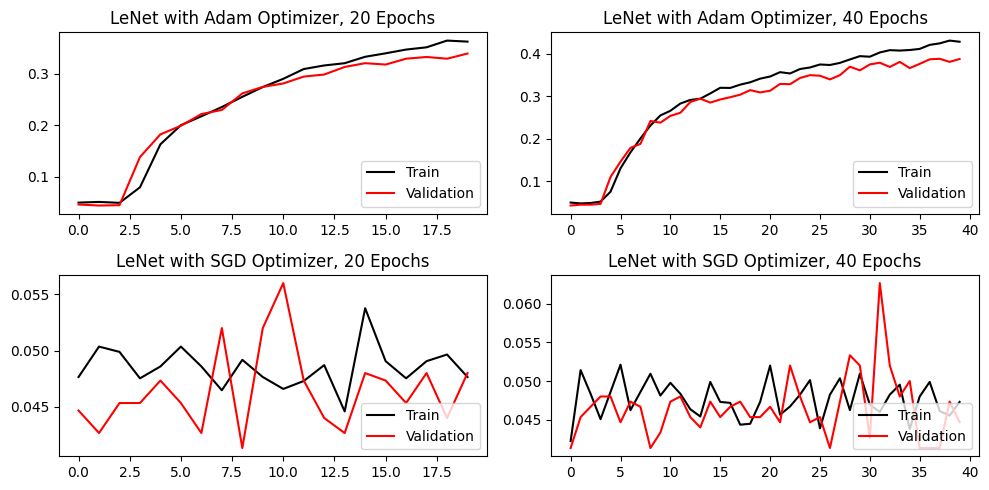

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [48]:
models_plot(
    lenet_adam_history_20, "LeNet with Adam Optimizer, 20 Epochs",
    lenet_adam_history_40, "LeNet with Adam Optimizer, 40 Epochs",
    lenet_sgd_history_20, "LeNet with SGD Optimizer, 20 Epochs",
    lenet_sgd_history_40, "LeNet with SGD Optimizer, 40 Epochs"
    )

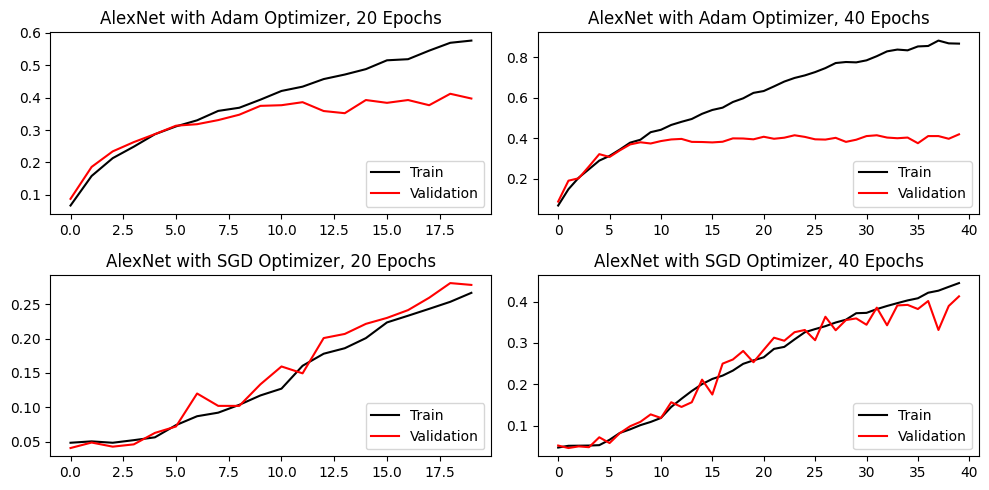

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [49]:
models_plot(
    alexNet_adam_history_20, "AlexNet with Adam Optimizer, 20 Epochs",
    alexNet_adam_history_40, "AlexNet with Adam Optimizer, 40 Epochs",
    alexNet_sgd_history_20, "AlexNet with SGD Optimizer, 20 Epochs",
    alexNet_sgd_history_40, "AlexNet with SGD Optimizer, 40 Epochs"
    )

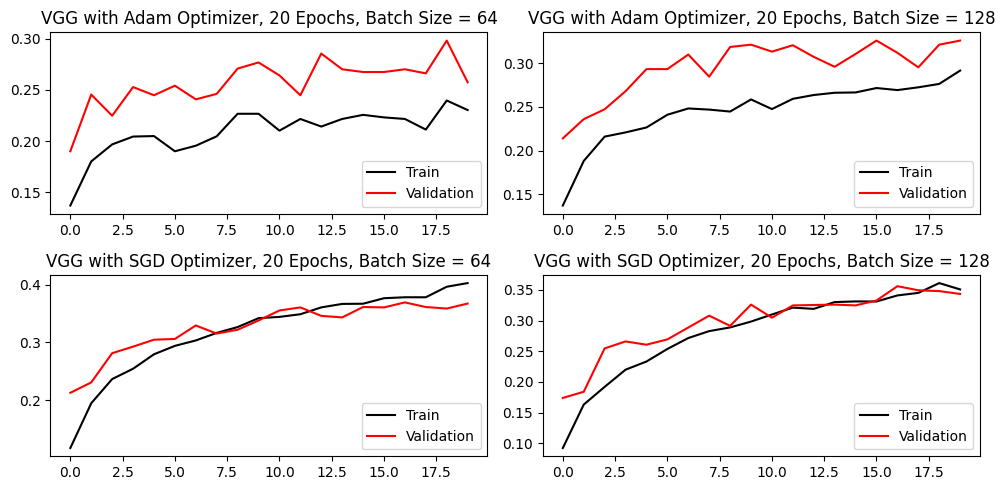

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [50]:
models_plot(
    VGG_adam_history_20, "VGG with Adam Optimizer, 20 Epochs, Batch Size = 64",
    VGG_adam_history_20_128, "VGG with Adam Optimizer, 20 Epochs, Batch Size = 128",
    VGG_sgd_history_20, "VGG with SGD Optimizer, 20 Epochs, Batch Size = 64",
    VGG_sgd_history_20_128, "VGG with SGD Optimizer, 20 Epochs, Batch Size = 128"
    )

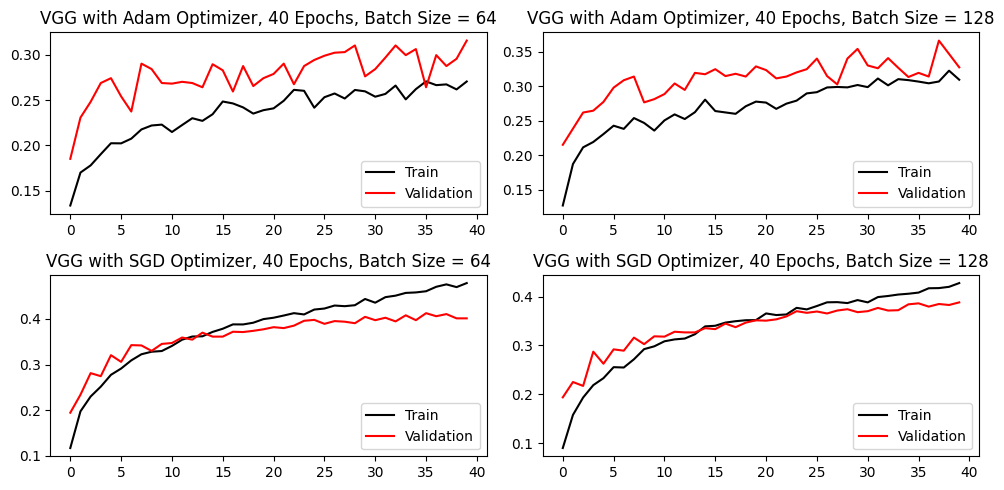

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [51]:
models_plot(
    VGG_adam_history_40, "VGG with Adam Optimizer, 40 Epochs, Batch Size = 64",
    VGG_adam_history_40_128, "VGG with Adam Optimizer, 40 Epochs, Batch Size = 128",
    VGG_sgd_history_40, "VGG with SGD Optimizer, 40 Epochs, Batch Size = 64",
    VGG_sgd_history_40_128, "VGG with SGD Optimizer, 40 Epochs, Batch Size = 128"
)

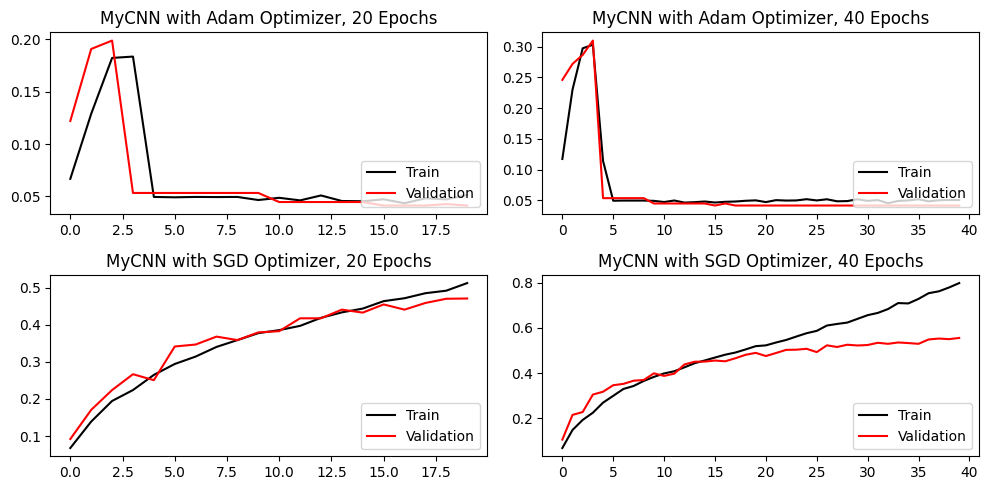

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

In [20]:
models_plot(
    myCNN_adam_history_20, "MyCNN with Adam Optimizer, 20 Epochs",
    myCNN_adam_history_40, "MyCNN with Adam Optimizer, 40 Epochs",
    myCNN_sgd_history_20, "MyCNN with SGD Optimizer, 20 Epochs",
    myCNN_sgd_history_40, "MyCNN with SGD Optimizer, 40 Epochs"
)

Καλύτερα

LeNet: Adam Optimizer, 40 Epochs

AlexNet: SGD Optimizer, 40 Epochs

VGG: SGD Optimizer, 40 Epochs, Batch Size = 64

MyCNN: SGD Optimizer, 40 Epochs

**Ερώτημα 2**

In [21]:
def best_models_plot(histories, model_names):
  color = ["k", "r", "g", "c"]
  fig = plt.figure(figsize=(7, 7))

  for i, h in enumerate(histories):
    plt.plot(h.history["accuracy"], color=color[i], label=model_names[i] + " Train Accuracy")
    plt.plot(h.history["val_accuracy"], color=color[i], linestyle="dotted", label=model_names[i] + " Validation Accuracy")

  plt.legend(loc="lower right")
  plt.title("Accuracy of the Best CNN Models") 

  return plt 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

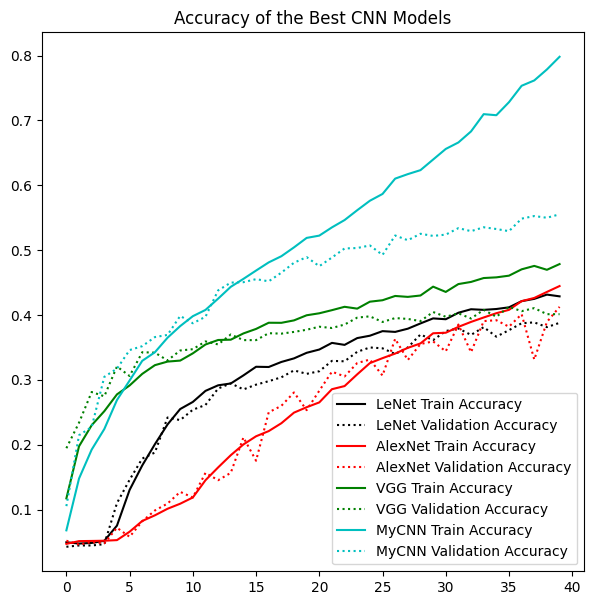

In [52]:
best_models = [lenet_adam_history_40, alexNet_sgd_history_40, VGG_sgd_history_40, myCNN_sgd_history_40]
names = ["LeNet", "AlexNet", "VGG", "MyCNN"]

best_models_plot(best_models, names)

**Ερώτημα 3**

- **Επίδραση του πλήθους των δεδομένων/κλάσεων στην απόδοση του μοντέλου.**

> Για μεγαλύτερο πλήθος δεδομένων ή κλάσεων που εισάγονται σε ένα CNN αυξάνεται ο χρόνος ολοκλήρωσης κάθε εποχής, άρα και ο συνολικός χρόνος εκπαίδευσης του μοντέλου, χωρίς απαραίτητα να βελτιώνεται η επίδοση του. Αυτό οφείλεται στο γεγονός, ότι η αύξηση των εικόνων που εισάγουμε στο dataset συναπάγεται αύξηση των κλάσεων, επομένως αυξάνεται και η συνθετότητα του προβλήματος ταξινόμησης.

- **Επίδραση του αλγόριθμου βελτιστοποίησης (optimizer).**

> Ο Adam Optimizer συγκλίνει πιο γρήγορα από τον τον SGD. Παρατηρούμε πως χρησιμοποιώντας τον SGD πετυχαίνουμε καλύτερα αποτελέσματα παρόλου που γίνεται overfitting - εκτός από το LeNet δίκτυο που επιτυγχάνει καλύτερη απόδοση με τον Adam. Επιπλέον, ο Adam απαιτεί περισσότερη μνήμη.

- **Επίδραση του μεγέθους δέσμης (batch size).**

> Παρατηρούμε πως εάν αυξήσουμε το Batch Size ο χρόνος που απαιτείται για να τελέιωσει κάθε εποχή αυξάνεται. Για μικρότερο, όμως, για μικρότερο batch size το μοντέλο έχει καλύτερα αποτελέσματα, και συγκλίνει πιο γρήγορα. Για μεγαλύτερο batch size, βλέπουμε πως το μοντέλο συγκλίνει πιο αργά, αλλά πιο σταθερά.

#### Βήμα 3: Αξιολόγηση ορθότητας
Αξιολογήστε την ορθότητα για το test set σας.

> Θα αξιολογηθούν το test set των μοντέλων που είχαν την καλύτερη επίδοση, σύμφωνα με τα αποτελέσματα που βγήκαν στον *Βήμα 2*.

In [53]:
lenet_preds = np.argmax(lenet_adam_40.predict(x_test), axis=-1)
score = accuracy_score(y_test, lenet_preds)

print(f"\nAccuracy of LeNet Model for test set: {score}")

63/63 [==============================] - 0s 3ms/step

Accuracy of LeNet Model for test set: 0.407


In [54]:
alexNet_preds = np.argmax(alexNet_sgd_40.predict(x_test), axis=-1)
score = accuracy_score(y_test, alexNet_preds)

print(f"\nAccuracy of AlexNet Model for test set: {score}")

63/63 [==============================] - 0s 6ms/step

Accuracy of AlexNet Model for test set: 0.4225


In [55]:
VGG_preds = np.argmax(VGG_sgd_40.predict(x_test), axis=-1)
score = accuracy_score(y_test, VGG_preds)

print(f"\nAccuracy of VGG Model for test set: {score}")

63/63 [==============================] - 0s 2ms/step

Accuracy of VGG Model for test set: 0.419


In [23]:
myCNN_preds = np.argmax(myCNN_sgd_40.predict(x_test), axis=-1)
score = accuracy_score(y_test, myCNN_preds)

print(f"\nAccuracy of MyCNN Model for test set: {score}")

63/63 [==============================] - 1s 9ms/step

Accuracy of MyCNN Model for test set: 0.578



### Ερώτημα 2
---
#### Βήμα 1: Έλεγχος υπερεκπαίδευσης

Για τον καλύτερο συνδυασμό που λάβατε από το Ερώτημα 1 για μοντέλο σας  (**MyCNN**) και μόνο, δοκιμάστε διάφορους συνδυασμούς των ακόλουθων τεχνικών για τον έλεγχο της υπερεκπαίδευσης (overfitting), όπως: 

- Dropout ([Dropout](https://www.tensorflow.org/tutorials/images/classification#dropout))

- Επαύξηση δεδομένων ([Data augmentation](https://www.tensorflow.org/tutorials/images/classification#data_augmentation), [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator#class_imagedatagenerator)) 

\\
, ώστε το μοντέλο σας να γενικεύει καλύτερα.

---
#### Βήμα 2: Αξιολόγηση
Αξιολογήστε της ορθότητας για το validation και το test set σας.

ΒΗΜΑ 1:
Εφόσον εχουμε χρησιμοποιήσει ήδη την τεχνική Dropout στο CNN μας, θα χρησιμοποιήσουμε σε αυτό την τεχνική Data Augmentation.Το Data Augmentation είναι μια τεχνική τεχνητής αύξησης του συνόλου εκπαίδευσης με τη δημιουργία τροποποιημένων αντιγράφων ενός συνόλου δεδομένων, χρησιμοποιώντας υπάρχοντα δεδομένα.Θα συγκρίνουμε τα αποτελέσματα με τον CNN μας, χωρίς την τεχνική Dropout


In [56]:
def MyCNN_no_dropout():
    
  model = models.Sequential()
  model.add(layers.Input(shape=x_train.shape[1:]))
  model.add(layers.Conv2D(filters=256, kernel_size=7, padding="same", activation=tf.keras.layers.LeakyReLU()))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=256, kernel_size=5, padding="same", activation=tf.keras.layers.LeakyReLU()))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Conv2D(filters=512, kernel_size=3, padding="same", activation=tf.keras.layers.LeakyReLU()))
  model.add(layers.MaxPool2D(pool_size=2, strides=2))
  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation="relu", kernel_initializer=initializers.glorot_uniform(seed=0)))
  model.add(layers.Dense(1024, activation="relu", kernel_initializer=initializers.glorot_uniform(seed=0)))
  model.add(layers.Dense(100, activation="softmax", kernel_initializer=initializers.glorot_uniform(seed=0)))

  return model

In [57]:
no_dropout = MyCNN_no_dropout()
no_dropout.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), metrics="accuracy")
no_dropout_history_40 = no_dropout.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=40,batch_size=128)

no_dropout.save("CNN_No_Dropout.h5")

Epoch 1/40
67/67 [==============================] - 9s 97ms/step - loss: 3.5838 - accuracy: 0.0688 - val_loss: 3.2648 - val_accuracy: 0.0587
Epoch 2/40
67/67 [==============================] - 4s 66ms/step - loss: 2.9246 - accuracy: 0.1101 - val_loss: 3.0366 - val_accuracy: 0.0847
Epoch 3/40
67/67 [==============================] - 4s 67ms/step - loss: 2.8333 - accuracy: 0.1224 - val_loss: 2.9633 - val_accuracy: 0.1220
Epoch 4/40
67/67 [==============================] - 4s 67ms/step - loss: 2.7134 - accuracy: 0.1573 - val_loss: 2.7036 - val_accuracy: 0.1673
Epoch 5/40
67/67 [==============================] - 5s 68ms/step - loss: 2.5974 - accuracy: 0.1932 - val_loss: 2.7042 - val_accuracy: 0.1767
Epoch 6/40
67/67 [==============================] - 4s 67ms/step - loss: 2.4762 - accuracy: 0.2176 - val_loss: 2.4996 - val_accuracy: 0.2087
Epoch 7/40
67/67 [==============================] - 5s 68ms/step - loss: 2.3834 - accuracy: 0.2387 - val_loss: 2.4259 - val_accuracy: 0.2393
Epoch 8/40
67

In [58]:
def MyCNN_dropout():
    
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    loss = tf.keras.losses.categorical_crossentropy

    model = models.Sequential()
    model.add(layers.Input(shape=x_train.shape[1:]))
    model.add(layers.Conv2D(filters=256, kernel_size=7, padding="same", activation=tf.keras.layers.LeakyReLU()))
    model.add(layers.MaxPool2D(pool_size=2, strides=2))
    model.add(layers.Conv2D(filters=256, kernel_size=5, padding="same", activation=tf.keras.layers.LeakyReLU()))
    model.add(layers.MaxPool2D(pool_size=2, strides=2))
    model.add(layers.Conv2D(filters=512, kernel_size=3, padding="same", activation=tf.keras.layers.LeakyReLU()))
    model.add(layers.MaxPool2D(pool_size=2, strides=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation="relu", kernel_initializer=initializers.glorot_uniform(seed=0)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation="relu", kernel_initializer=initializers.glorot_uniform(seed=0)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(20, activation="softmax", kernel_initializer=initializers.glorot_uniform(seed=0)))


    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    model.summary()
    return model

In [60]:
# Apply data augmentation
y_train_aug = to_categorical(y_train, classes_num)
y_test_aug = to_categorical(y_test, classes_num)
y_val_aug = to_categorical(y_val, classes_num)

# Data generator for train and validation set
data_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.2)

# Data generator for test set
test_data_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

# compute quantities required for featurewise normalization (std, mean, and principal components)
data_generator.fit(x_train)

In [61]:
mycnn4 = MyCNN_dropout()
model_history10 = mycnn4.fit(data_generator.flow(x_train, y_train_aug, batch_size=128),
                    steps_per_epoch=len(x_train)/128, epochs=40,
                    validation_data=data_generator.flow(x_val, y_val_aug, batch_size=128),
                    validation_steps = len(x_val)/128)

mycnn4.save('mycnn4_final.h5')

Model: "sequential_45"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_59 (Conv2D)          (None, 32, 32, 256)       37888     
                                                                 
 max_pooling2d_43 (MaxPoolin  (None, 16, 16, 256)      0         
 g2D)                                                            
                                                                 
 conv2d_60 (Conv2D)          (None, 16, 16, 256)       1638656   
                                                                 
 max_pooling2d_44 (MaxPoolin  (None, 8, 8, 256)        0         
 g2D)                                                            
                                                                 
 conv2d_61 (Conv2D)          (None, 8, 8, 512)         1180160   
                                                                 
 max_pooling2d_45 (MaxPoolin  (None, 4, 4, 512)      

BHMA 2

In [62]:
def plot_accuracy(history):
    plt.figure(figsize=(8, 5))
    plt.title('Classification Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='red', label='val')
    plt.legend(loc='upper right')
    return plt

Για το 1ο CNN

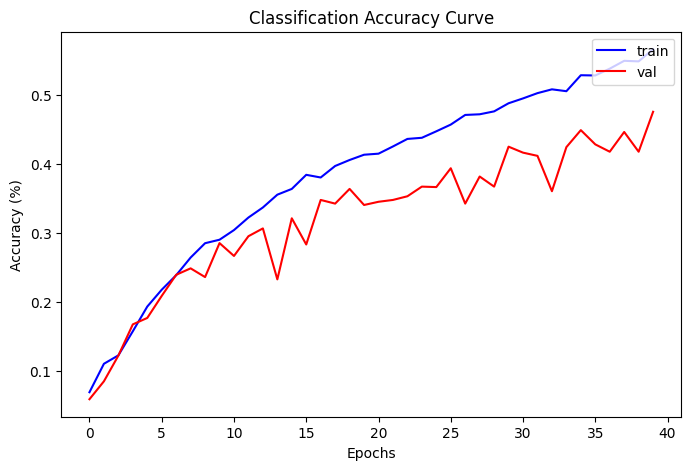

In [63]:
plot_accuracy(no_dropout_history_40) 
plt.show()

In [64]:
print(" MyCNN Model - NO Dropout ")

print('Validation set Evaluation metrics')
loss, accuracy = no_dropout.evaluate(x_val, y_val)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))

print('\nTest set Evaluation metrics')
loss, accuracy = no_dropout.evaluate(x_test, y_test)
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))

 MyCNN Model - NO Dropout 
Validation set Evaluation metrics
47/47 [==============================] - 0s 8ms/step - loss: 1.8025 - accuracy: 0.4760
Loss: 1.80
Accuracy: 0.48

Test set Evaluation metrics
63/63 [==============================] - 0s 7ms/step - loss: 1.7391 - accuracy: 0.4915
Loss: 1.74
Accuracy: 0.49


Για το 2ο CNN

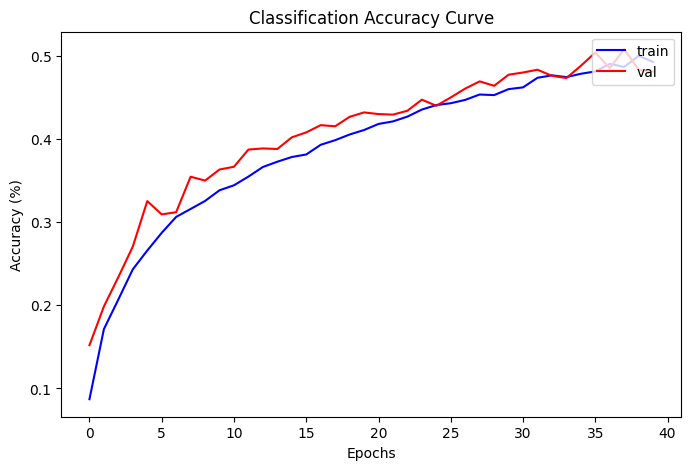

In [65]:
plot_accuracy(model_history10) 
plt.show()

In [66]:
print("\n MyCNN Model - Dropout, Data Augmentation ")

print('Validation set Evaluation metrics')
loss, accuracy = mycnn4.evaluate(data_generator.flow(x_val, y_val_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))

print('\nTest set Evaluation metrics')
loss, accuracy = mycnn4.evaluate(data_generator.flow(x_test, y_test_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))


 MyCNN Model - Dropout, Data Augmentation 
Validation set Evaluation metrics
12/12 [==============================] - 1s 77ms/step - loss: 1.6178 - accuracy: 0.5020
Loss: 1.62
Accuracy: 0.50

Test set Evaluation metrics
16/16 [==============================] - 2s 115ms/step - loss: 1.5415 - accuracy: 0.5310
Loss: 1.54
Accuracy: 0.53


### Ερώτημα 3
---
#### Βήμα 1: Μεταφορά γνώσης
Εφαρμόστε μεταφορά γνώσης (transfer learning) στο δικό σας μοντέλο (**MyCNN**), που αξιολογήσατε ως καλύτερο προς την ορθότητα στην αντιμετώπιση της υπερεκπαίδεσης. 

Για το transfer learning, επιλέξτε το [VGG19](https://www.tensorflow.org/api_docs/python/tf/keras/applications/vgg19)  και το [EfficientNetB0](https://www.tensorflow.org/api_docs/python/tf/keras/applications/efficientnet/EfficientNetB0) για μεταφορά μάθησης.

1. "Παγώστε" τη συνελικτική βάση και εκπαιδεύστε την κεφαλή ταξινόμησης (classification head - σημαία trainable = False).  

2. Εκπαιδέστε μόνο ένα ποσοστό των επιπέδων, το οποίο βρίσκεται προς την έξοδο του δικτύου. Οι σημαίες trainable εδώ θα πρέπει να οριστούν ανά επίπεδο.

3. Αξιολογήστε τα αποτελέσματά σας, βάσει της ορθότητας του validation set και του test set σας.

Για το VGG19  
1)

In [67]:
# Transfel Learning 1: Load Pretrained Model and Freeze Convolutional Base
pretrained_model = tf.keras.applications.VGG16(
    include_top=False, weights='imagenet', input_tensor=None, input_shape=(32,32,3),
    pooling=max, classes=classes_num
)
pretrained_model.trainable=False # Freeze Weights

58889256/58889256 [==============================] - 3s 0us/step


In [68]:
def transfer_learning_model1():

    model = models.Sequential([pretrained_model])
  
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation="relu", kernel_initializer=initializers.glorot_uniform(seed=0)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation="relu", kernel_initializer=initializers.glorot_uniform(seed=0)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(20, activation="softmax", kernel_initializer=initializers.glorot_uniform(seed=0)))
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    loss = tf.keras.losses.categorical_crossentropy


    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    model.summary()
    return model 

In [69]:
transfer_model1 = transfer_learning_model1()

Model: "sequential_46"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_22 (Flatten)        (None, 512)               0         
                                                                 
 dense_66 (Dense)            (None, 4096)              2101248   
                                                                 
 dropout_34 (Dropout)        (None, 4096)              0         
                                                                 
 dense_67 (Dense)            (None, 1024)              4195328   
                                                                 
 dropout_35 (Dropout)        (None, 1024)              0         
                                                                 
 dense_68 (Dense)            (None, 20)              

In [70]:
transfer_model_history1 = transfer_model1.fit(data_generator.flow(x_train, y_train_aug, batch_size=128),
                    steps_per_epoch=len(x_train)/128, epochs=20,
                    validation_data=data_generator.flow(x_val, y_val_aug, batch_size=128),
                    validation_steps = len(x_val)/128) 

transfer_model1.save('transfer1.h5')

Epoch 1/20
66/66 [==============================] - 10s 126ms/step - loss: 2.9376 - accuracy: 0.1046 - val_loss: 2.7018 - val_accuracy: 0.2780
Epoch 2/20
66/66 [==============================] - 6s 93ms/step - loss: 2.6589 - accuracy: 0.2111 - val_loss: 2.4350 - val_accuracy: 0.3540
Epoch 3/20
66/66 [==============================] - 7s 107ms/step - loss: 2.4253 - accuracy: 0.2806 - val_loss: 2.2192 - val_accuracy: 0.4000
Epoch 4/20
66/66 [==============================] - 7s 99ms/step - loss: 2.2484 - accuracy: 0.3296 - val_loss: 2.0803 - val_accuracy: 0.4113
Epoch 5/20
66/66 [==============================] - 6s 94ms/step - loss: 2.1250 - accuracy: 0.3492 - val_loss: 1.9641 - val_accuracy: 0.4107
Epoch 6/20
66/66 [==============================] - 7s 103ms/step - loss: 2.0173 - accuracy: 0.3793 - val_loss: 1.8706 - val_accuracy: 0.4467
Epoch 7/20
66/66 [==============================] - 6s 96ms/step - loss: 1.9504 - accuracy: 0.4033 - val_loss: 1.8406 - val_accuracy: 0.4567
Epoch 8/2

2)Παγώνουμε την εκπαίδευση του 3ου απτό τέλος layer ενώ επιτρπέπουμε την εκπαίδευση στα υπόλοιπα


In [71]:
def transfer_learning_model2():

    model = models.Sequential([pretrained_model])
  
    model.add(layers.Flatten())
    model.add(layers.Dense(4096,  trainable=False))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation="relu", kernel_initializer=initializers.glorot_uniform(seed=0)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(20, activation="softmax", kernel_initializer=initializers.glorot_uniform(seed=0)))
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    loss = tf.keras.losses.categorical_crossentropy


    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    model.summary()
    return model 

In [72]:
transfer_model2 = transfer_learning_model2()

Model: "sequential_47"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 1, 1, 512)         14714688  
                                                                 
 flatten_23 (Flatten)        (None, 512)               0         
                                                                 
 dense_69 (Dense)            (None, 4096)              2101248   
                                                                 
 dropout_36 (Dropout)        (None, 4096)              0         
                                                                 
 dense_70 (Dense)            (None, 1024)              4195328   
                                                                 
 dropout_37 (Dropout)        (None, 1024)              0         
                                                                 
 dense_71 (Dense)            (None, 20)              

In [73]:
weights = transfer_model1.layers[-3].get_weights()  
transfer_model2.layers[-3].set_weights(weights)

In [74]:
transfer_model_history2 = transfer_model2.fit(data_generator.flow(x_train, y_train_aug, batch_size=128),
                    steps_per_epoch=len(x_train)/128, epochs=20,
                    validation_data=data_generator.flow(x_val, y_val_aug, batch_size=128),
                    validation_steps = len(x_val)/128) 

transfer_model2.save('transfer1.h5')

Epoch 1/20
66/66 [==============================] - 8s 106ms/step - loss: 2.9629 - accuracy: 0.1005 - val_loss: 2.6181 - val_accuracy: 0.2933
Epoch 2/20
66/66 [==============================] - 7s 105ms/step - loss: 2.6592 - accuracy: 0.1896 - val_loss: 2.3741 - val_accuracy: 0.3580
Epoch 3/20
66/66 [==============================] - 7s 107ms/step - loss: 2.4283 - accuracy: 0.2709 - val_loss: 2.1930 - val_accuracy: 0.3760
Epoch 4/20
66/66 [==============================] - 6s 94ms/step - loss: 2.2881 - accuracy: 0.3008 - val_loss: 2.0499 - val_accuracy: 0.4093
Epoch 5/20
66/66 [==============================] - 7s 103ms/step - loss: 2.1864 - accuracy: 0.3276 - val_loss: 1.9681 - val_accuracy: 0.4093
Epoch 6/20
66/66 [==============================] - 6s 92ms/step - loss: 2.0988 - accuracy: 0.3526 - val_loss: 1.8950 - val_accuracy: 0.4380
Epoch 7/20
66/66 [==============================] - 6s 94ms/step - loss: 2.0185 - accuracy: 0.3734 - val_loss: 1.8694 - val_accuracy: 0.4213
Epoch 8/2

3)

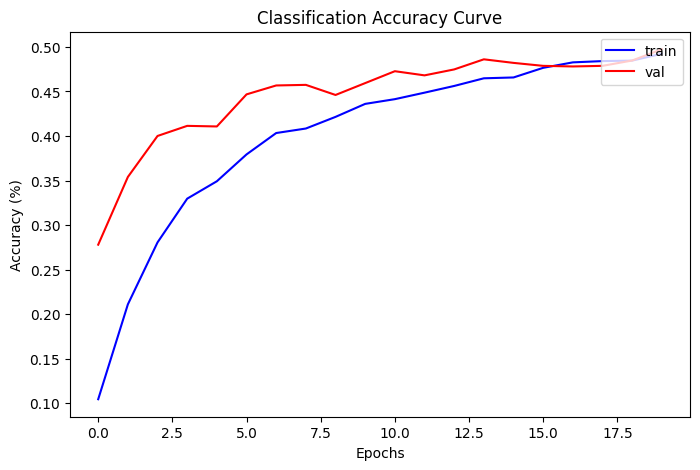

In [75]:
plot_accuracy(transfer_model_history1)
plt.show()

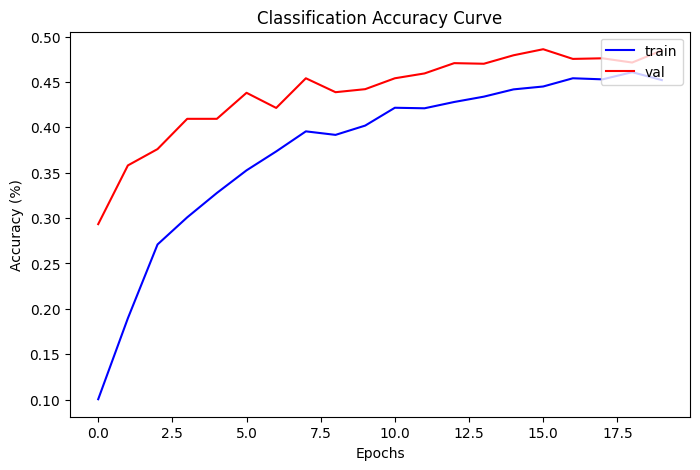

In [76]:
plot_accuracy(transfer_model_history2)
plt.show()

In [77]:
print("\n Transfer Learning - First Model ")

print('Validation set Evaluation metrics')
loss, accuracy = transfer_model1.evaluate(data_generator.flow(x_val, y_val_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))

print('\nTest set Evaluation metrics')
loss, accuracy = transfer_model1.evaluate(data_generator.flow(x_test, y_test_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))


 Transfer Learning - First Model 
Validation set Evaluation metrics
12/12 [==============================] - 1s 78ms/step - loss: 1.6282 - accuracy: 0.4860
Loss: 1.63
Accuracy: 0.49

Test set Evaluation metrics
16/16 [==============================] - 2s 112ms/step - loss: 1.4610 - accuracy: 0.5335
Loss: 1.46
Accuracy: 0.53


In [78]:
print("\n Transfer Learning - Second Model ")

print('Validation set Evaluation metrics')
loss, accuracy = transfer_model2.evaluate(data_generator.flow(x_val, y_val_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))

print('\nTest set Evaluation metrics')
loss, accuracy = transfer_model2.evaluate(data_generator.flow(x_test, y_test_aug, batch_size=128))
print("Loss: {:.2f}".format(loss))
print("Accuracy: {:.2f}".format(accuracy))


 Transfer Learning - Second Model 
Validation set Evaluation metrics
12/12 [==============================] - 1s 79ms/step - loss: 1.6518 - accuracy: 0.4887
Loss: 1.65
Accuracy: 0.49

Test set Evaluation metrics
16/16 [==============================] - 1s 76ms/step - loss: 1.5308 - accuracy: 0.5170
Loss: 1.53
Accuracy: 0.52


Αυτό που γίνεται γρήγορα εμφανές είναι πως η χρήση προεκπαιδευμένων μοντέλων βοηθάει αρκετά στην ταχύτερη εκπαίδευση του CNN μας.Επίσης παρατηρούμε πως παγώνοντας τα επίπεδα κοντά στην έξοδο αυξάνεται αρκετά η ακρίβεια του CNN μας το οποίο μας είναι επίσης αρκετά βοηθητικό

Για το  EfficientNetB0  
1)

In [79]:
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB0(
    include_top=False, weights='imagenet', input_tensor=None, input_shape=(32,32,3),
    pooling=max, classes=classes_num
)
pretrained_model.trainable=False # Freeze Weights

16705208/16705208 [==============================] - 2s 0us/step


In [80]:
def transfer_learning_model1():

    

    model = models.Sequential([pretrained_model])
  
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation="relu", kernel_initializer=initializers.glorot_uniform(seed=0)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation="relu", kernel_initializer=initializers.glorot_uniform(seed=0)))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(20, activation="softmax", kernel_initializer=initializers.glorot_uniform(seed=0)))
    optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
    loss = tf.keras.losses.categorical_crossentropy


    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    
    model.summary()
    return model 

### Διαχείριση μνήμης (TFRecord)
Η φόρτωση δεδομένων με τον τρόπο που το κάναμε παραπάνω στο απλό παράδειγμα υλοποίησης είναι πολύ βολική αλλά δεν είναι αποτελεσματική ως προς τη διαχείριση της μνήμης. Συγκεκριμένα, με τον τρόπο αυτό, τα δεδομένα αποθηκεύονται απευθείας σε μεταβλητές, οι οποίες όλες μαζί καταλαμβάνουν τη RAM της CPU ή της GPU, κάτι που κάνει αδύνατη τη διαχείριση μεγάλων datasets ή τον μεταχηματισμό των δεδομένων όπως όταν κάνουμε αύξηση δεδομένων (data augmentation).

Για να παρακαμφθεί αυτό το πρόβλημα, υπάρχει η δυνατότητα της σειριοποίησης των δεδομένων (serialization) και της αποθήκευσής τους σε αρχεία μεσαίου μεγέθους (κάποιων MB) τα οποία μπορούν να αναγνωστούν γραμμικά.

Το φορμάτ TFRecord είναι ένα φορμάτ που επιτρέπει την αποθήκευση σειράς δυαδικών εγγραφών. Διαβάστε σχετικά για το [TFRecord and tf.Example](https://www.tensorflow.org/tutorials/load_data/tfrecord) και [tf.data: Build TensorFlow input pipelines](https://www.tensorflow.org/guide/data). 

Σημειώστε ότι με τη μέθοδο αυτή θα πρέπει να γίνει import η `tensorflow_datasets` και να χρησιμοποιήσουμε την `tfds.load` ώστε να αποθηκευθεί το σύνολο δεδομένων σε αρχεία tfrecord στο δίσκο (δείτε [εδώ](https://colab.research.google.com/github/tensorflow/datasets/blob/master/docs/overview.ipynb) ένα παράδειγμα). Φυσικά μπορούμε να μετατρέψουμε και τα πρωτογενή δεδομένα (raw data) του dataset όπως αρχεία jpg σε φορματ tfrecord όπως [εδώ](https://towardsdatascience.com/working-with-tfrecords-and-tf-train-example-36d111b3ff4d).


In [82]:
(ds_train, ds_test), ds_info = tfds.load('cifar100', split=['train', 'test'], shuffle_files=True, as_supervised=True, with_info=True)
assert isinstance(ds_train, tf.data.Dataset)
assert isinstance(ds_test, tf.data.Dataset)